# Simple application of essential python libraries

Get an intuitive and applicative understanding of numpy, pandas and matplotlib by using these libraries to play with data often found in real life applications.

This book is for understanding the libraries, so make sure to experiment as much as you can, you dont have to stick to exactly what is asked.

Guidelines:

*   Fill the codeblocks according to the comments given
*   Hints are given wherever required
*   Your first debugging step should be to print errors to identify the issue.Understand why it went wrong by analyzing the outputs and error messages. Adjust your code to fix the problem systematically.
*   If stuck, you're welcome to utilize any online resources, and feel free to ask doubts in the group!


In [2]:
#import necessary dependencies
import urllib.request
# ...other dependencies

##Data to work on

In [5]:
# Step 1: Load the dataset, dont focus on this part
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
filename = "airtravel.csv"
urllib.request.urlretrieve(url, filename)

Where did this .csv file get saved? load it using pandas!

In [15]:
import pandas as pd
#load the .csv file using pandas
data = pd.read_csv(url)
#create an ndarray from this pandas df, but ignore the "Month" column (slicing, maybe?)
import numpy as np
arr = np.array(data)[:,1:]
print(arr)

[[340 360 417]
 [318 342 391]
 [362 406 419]
 [348 396 461]
 [363 420 472]
 [435 472 535]
 [491 548 622]
 [505 559 606]
 [404 463 508]
 [359 407 461]
 [310 362 390]
 [337 405 432]]


In [17]:
#Calculate the mean value across all three years for each month (mean_original) using an np function and return an ndarray consisting mean passengers for each month
mean_original = np.mean(arr, axis=1)
print(mean_original)

[372.3333333333333 350.3333333333333 395.6666666666667 401.6666666666667
 418.3333333333333 480.6666666666667 553.6666666666666 556.6666666666666
 458.3333333333333 409.0 354.0 391.3333333333333]


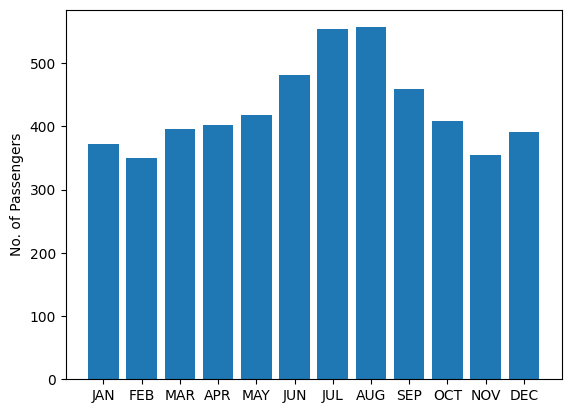

In [27]:
#use matplotlib to plot a bargraph to visualize mean number of passengers across different months
import matplotlib.pyplot as plt
y_axis = mean_original
x_axis = data['Month']
plt.bar(x_axis, y_axis)
plt.ylabel('No. of Passengers')
plt.show()

##Transforming data

Let's visualize the data

Simulate a spike across the data

In [29]:
#Simply create a list with the same shape as previous arrays, and fill it with data simulating a spike across months peaking at 100, width, number of peaks, etc. are upto you!
spike = [0,0,10,20,50,100,150,90,40,5,0,0]

#convert the list to a pandas series spike_series, and the mean_original to a pandas series also
spike_series = pd.Series(spike)
original_series = pd.Series(mean_original)

#define a function called transform_orig() that adds spike_series element-wise to original_series (use .add())
def transform_orig(original, spike):
  return original.add(spike)

#call the function and obtain a spiked_data series, and convert it back to a list
spiked_data = list(transform_orig(original_series, spike_series))
print(spiked_data)

[372.3333333333333, 350.3333333333333, 405.6666666666667, 421.6666666666667, 468.3333333333333, 580.6666666666667, 703.6666666666666, 646.6666666666666, 498.3333333333333, 414.0, 354.0, 391.3333333333333]


Plot the new spiked_data across months to visualize the spike's impact on number of passengers

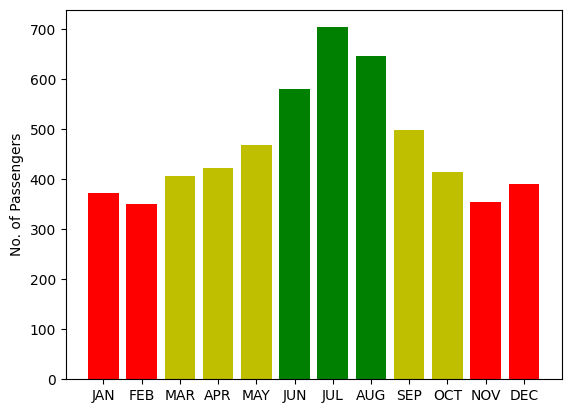

In [35]:
#similar to how you plotted it before! (bonus: make it colorful)
y_axis = spiked_data
x_axis = data['Month']

colors = []
for val in spiked_data:
  if val>500: colors.append('g')
  elif val<400: colors.append('r')
  else: colors.append('y')

plt.bar(x_axis, y_axis, color=colors)
plt.ylabel('No. of Passengers')
plt.show()


## Compare!

Now, all thats left is to compare the graphs

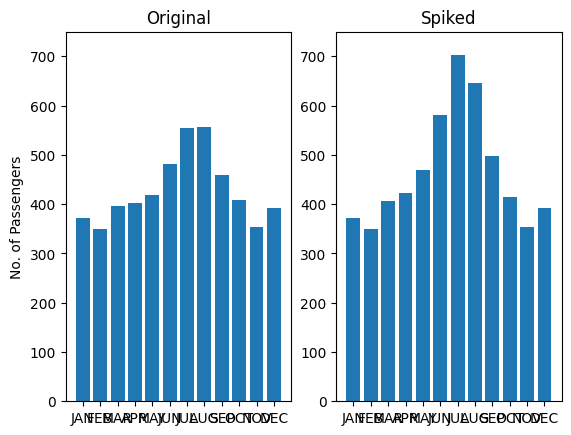

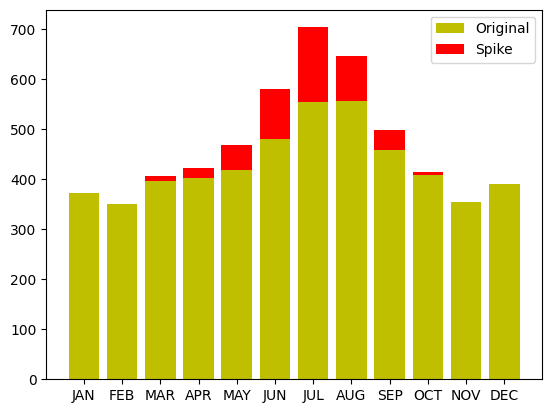

In [54]:
#Create a subplot with first and second plot, along with a graph showing how the data has changed before and after spike (could be a bar graph, upto you, be creative)
scale=np.arange(0,800,100)

plt.subplot(1,2,1)
y_axis = mean_original
x_axis = data['Month']
plt.bar(x_axis, y_axis)
plt.title('Original')
plt.ylabel('No. of Passengers')
plt.ylim(0,750)

plt.subplot(1,2,2)
y_axis = spiked_data
x_axis = data['Month']
plt.bar(x_axis, y_axis)
plt.title('Spiked')
plt.ylim(0,750)

plt.show()

plt.bar(data['Month'], mean_original, color='y')
plt.bar(data['Month'], spiked_data-mean_original, bottom=mean_original, color='r')
plt.legend(['Original', 'Spike'])
plt.show()